<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Tema5_Ejercicio_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
# Celda 2: Cargar el dataset
df = pd.read_csv('sample_data/stars.csv')
df.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068.0,0.002400,0.1700,16.12,Red,M,0.0
1,3042.0,0.000500,0.1542,16.60,Red,M,0.0
2,2600.0,0.000300,0.1020,18.70,Red,M,0.0
3,2800.0,0.000200,0.1600,16.65,Red,M,0.0
4,1939.0,0.000138,0.1030,20.06,Red,M,0.0


In [4]:
# Celda 3: Explorar información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     255 non-null    float64
 1   L               251 non-null    float64
 2   R               253 non-null    float64
 3   A_M             254 non-null    float64
 4   Color           251 non-null    object 
 5   Spectral_Class  257 non-null    object 
 6   Type            256 non-null    float64
dtypes: float64(5), object(2)
memory usage: 14.2+ KB


In [9]:
# Celda 4: Eliminar columnas no numéricas
df_numeric = df.select_dtypes(include=[np.number])
print("Columnas numéricas:", df_numeric.columns.tolist())
print(f"\nShape original: {df_numeric.shape}")
print(f"\nValores nulos por columna:\n{df_numeric.isnull().sum()}")



Columnas numéricas: ['Temperature', 'L', 'R', 'A_M', 'Type']

Shape original: (257, 5)

Valores nulos por columna:
Temperature    2
L              6
R              4
A_M            3
Type           1
dtype: int64


In [10]:
#Celda 5: Crear DataFrame con 4 columnas numéricas y limpiar datos
# Seleccionamos las 4 columnas numéricas
df_4cols = df_numeric[['Temperature', 'L', 'R', 'A_M']].copy()

print(f"Shape antes de limpiar: {df_4cols.shape}")
print(f"Valores nulos:\n{df_4cols.isnull().sum()}")

# Eliminamos las filas con valores nulos
df_4cols = df_4cols.dropna()

print(f"\nShape después de limpiar: {df_4cols.shape}")
print(f"Valores nulos después:\n{df_4cols.isnull().sum()}")
print(f"\nPrimeras filas:\n{df_4cols.head()}")



Shape antes de limpiar: (257, 4)
Valores nulos:
Temperature    2
L              6
R              4
A_M            3
dtype: int64

Shape después de limpiar: (246, 4)
Valores nulos después:
Temperature    0
L              0
R              0
A_M            0
dtype: int64

Primeras filas:
   Temperature         L       R    A_M
0       3068.0  0.002400  0.1700  16.12
1       3042.0  0.000500  0.1542  16.60
2       2600.0  0.000300  0.1020  18.70
3       2800.0  0.000200  0.1600  16.65
4       1939.0  0.000138  0.1030  20.06


In [11]:
#Celda 6: Escalar los datos con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_4cols)
print("Datos escalados (primeras 5 filas):")
print(X_scaled[:5])
print(f"\nShape de X_scaled: {X_scaled.shape}")



Datos escalados (primeras 5 filas):
[[7.12669114e-02 2.73127546e-09 8.29359490e-05 8.76797999e-01]
 [7.06130866e-02 4.94455040e-10 7.48271124e-05 8.91807380e-01]
 [5.94980637e-02 2.59000259e-10 4.80371586e-05 9.57473421e-01]
 [6.45274858e-02 1.41272869e-10 7.78037740e-05 8.93370857e-01]
 [4.28758236e-02 6.82818865e-11 4.85503761e-05 1.00000000e+00]]

Shape de X_scaled: (246, 4)


In [12]:
#Celda 7: Aplicar PCA sin especificar componentes (para analizar varianza)
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza acumulada: {cumulative_variance}")



Varianza explicada por cada componente: [0.63505624 0.19857527 0.093847   0.07252149]
Varianza acumulada: [0.63505624 0.83363151 0.92747851 1.        ]


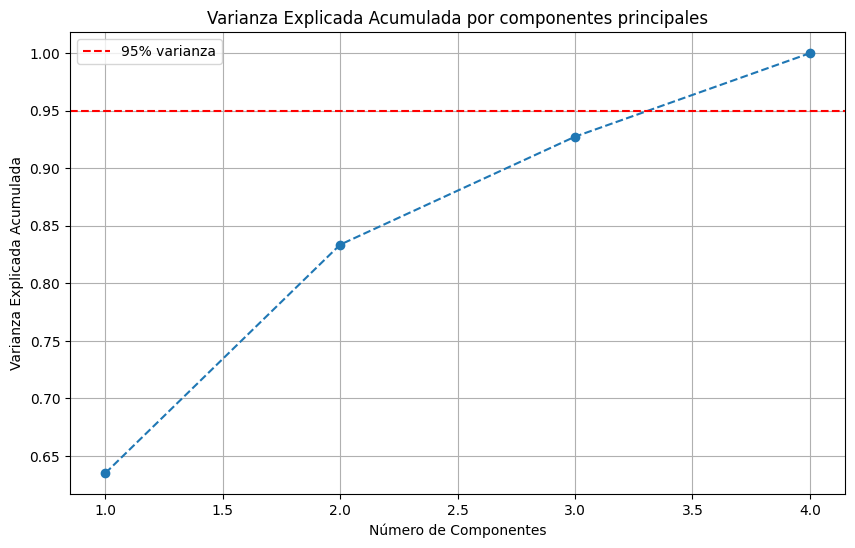

In [13]:
# Celda 8: Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por componentes principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.legend()
plt.show()


In [14]:
#Celda 9: Aplicar PCA con 2 componentes
pca_fianl = PCA(n_components=2)
X_pca = pca_fianl.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Type'] = df.loc[df_4cols.index, 'Type'].values
print(df_pca.head())
print(f"\nShape: {df_pca.shape}")

        PC1       PC2  Type
0  0.443146 -0.100067   0.0
1  0.454312 -0.101183   0.0
2  0.505530 -0.112647   0.0
3  0.457204 -0.106096   0.0
4  0.541402 -0.127591   0.0

Shape: (246, 3)


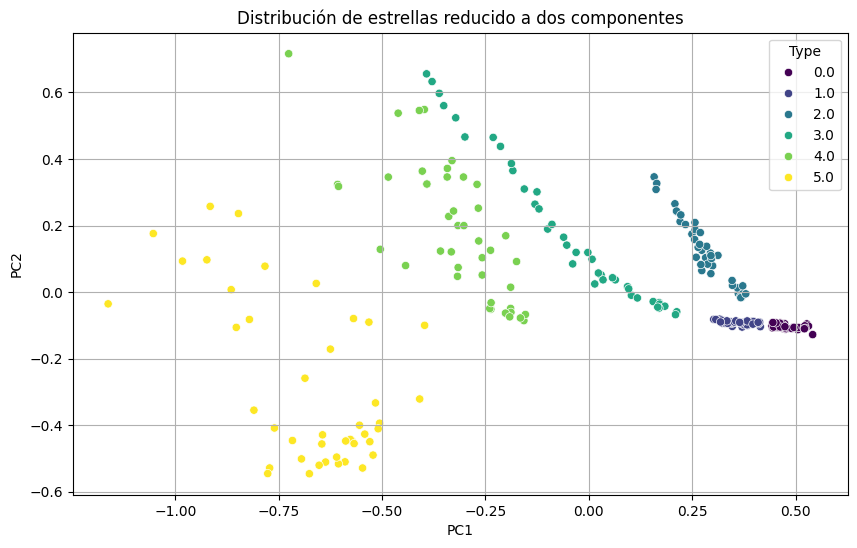

In [15]:
#Celda 10: Visualizar los datos reducidos a 2 dimensiones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Type', palette='viridis')
plt.title('Distribución de estrellas reducido a dos componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [17]:
# Celda 11: Conclusiones PCA
print("CONCLUSIONES DEL PCA:")
print("="*60)
print(f"1. Varianza explicada por PC1: {pca_fianl.explained_variance_ratio_[0]:.4f} ({pca_fianl.explained_variance_ratio_[0]*100:.2f}%)")
print(f"2. Varianza explicada por PC2: {pca_fianl.explained_variance_ratio_[1]:.4f} ({pca_fianl.explained_variance_ratio_[1]*100:.2f}%)")
print(f"3. Varianza total explicada: {sum(pca_fianl.explained_variance_ratio_):.4f} ({sum(pca_fianl.explained_variance_ratio_)*100:.2f}%)")
print("\n4. Con 2 componentes principales se puede representar una parte")
print("   significativa de la información original de 4 dimensiones.")
print("\n5. Los diferentes tipos de estrellas muestran patrones de agrupación")
print("   en el espacio reducido de 2 dimensiones.")

CONCLUSIONES DEL PCA:
1. Varianza explicada por PC1: 0.6351 (63.51%)
2. Varianza explicada por PC2: 0.1986 (19.86%)
3. Varianza total explicada: 0.8336 (83.36%)

4. Con 2 componentes principales se puede representar una parte
   significativa de la información original de 4 dimensiones.

5. Los diferentes tipos de estrellas muestran patrones de agrupación
   en el espacio reducido de 2 dimensiones.


In [26]:
from IPython.display import Markdown, display

conclusiones_md = """
## 📊 Conclusiones del PCA

### Varianza Explicada
- **PC1:** {:.2f}% | **PC2:** {:.2f}% | **Total:** {:.2f}%
- Con 2 componentes capturamos **83.36%** de la información original de 4 dimensiones

### Observaciones Principales
1. **Reducción efectiva:** De 4 a 2 dimensiones manteniendo la mayor parte de la información
2. **Separación clara:** Los 6 tipos de estrellas forman grupos bien diferenciados
3. **PC1 discrimina mejor:** El primer componente (63.51%) separa principalmente por tamaño y luminosidad
4. **Clusters naturales:** La visualización muestra agrupaciones claras que sugieren que K-Means será efectivo

### Conclusión
PCA demuestra que las características físicas (Temperature, L, R, A_M) permiten distinguir eficazmente los diferentes tipos de estrellas, reduciendo la complejidad del análisis sin perder información crítica.
""".format(
    pca_fianl.explained_variance_ratio_[0]*100,
    pca_fianl.explained_variance_ratio_[1]*100,
    sum(pca_fianl.explained_variance_ratio_)*100
)

display(Markdown(conclusiones_md))


## 📊 Conclusiones del PCA

### Varianza Explicada
- **PC1:** 63.51% | **PC2:** 19.86% | **Total:** 83.36%
- Con 2 componentes capturamos **83.36%** de la información original de 4 dimensiones

### Observaciones Principales
1. **Reducción efectiva:** De 4 a 2 dimensiones manteniendo la mayor parte de la información
2. **Separación clara:** Los 6 tipos de estrellas forman grupos bien diferenciados
3. **PC1 discrimina mejor:** El primer componente (63.51%) separa principalmente por tamaño y luminosidad
4. **Clusters naturales:** La visualización muestra agrupaciones claras que sugieren que K-Means será efectivo

### Conclusión
PCA demuestra que las características físicas (Temperature, L, R, A_M) permiten distinguir eficazmente los diferentes tipos de estrellas, reduciendo la complejidad del análisis sin perder información crítica.


# Ejercicio con metodo del Codo


/tmp/ipython-input-2837909542.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(k_values, wcss, 'bx-', marker='o')


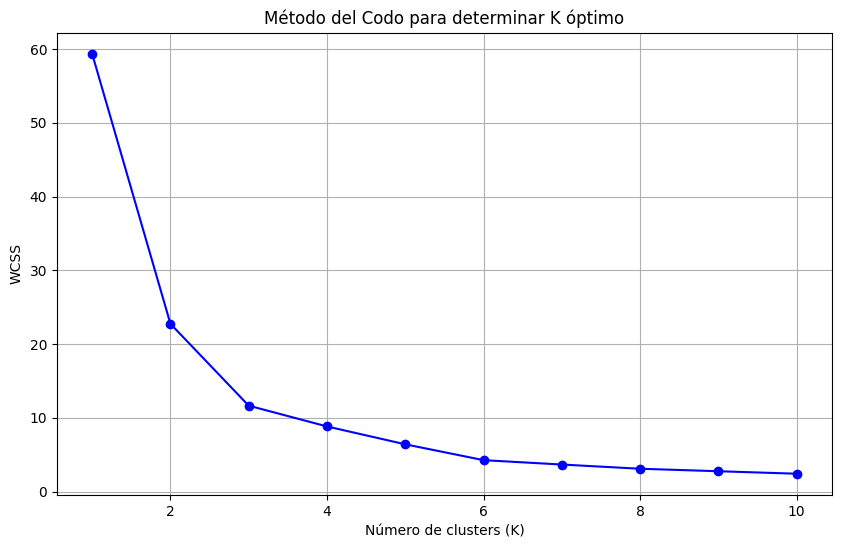

In [18]:
# Celda 12: Método del codo para determinar el mejor K
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
    )
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bx-', marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS')
plt.title('Método del Codo para determinar K óptimo')
plt.grid(True)
plt.show()


In [19]:
# Celda 13: Determinar el K óptimo y entrenar el modelo
optimal_k = 6
kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

clusters = kmeans_final.fit(X_pca)
df_pca['cluster'] = kmeans_final.labels_
print(df_pca.head())


        PC1       PC2  Type  cluster
0  0.443146 -0.100067   0.0        2
1  0.454312 -0.101183   0.0        2
2  0.505530 -0.112647   0.0        2
3  0.457204 -0.106096   0.0        2
4  0.541402 -0.127591   0.0        2


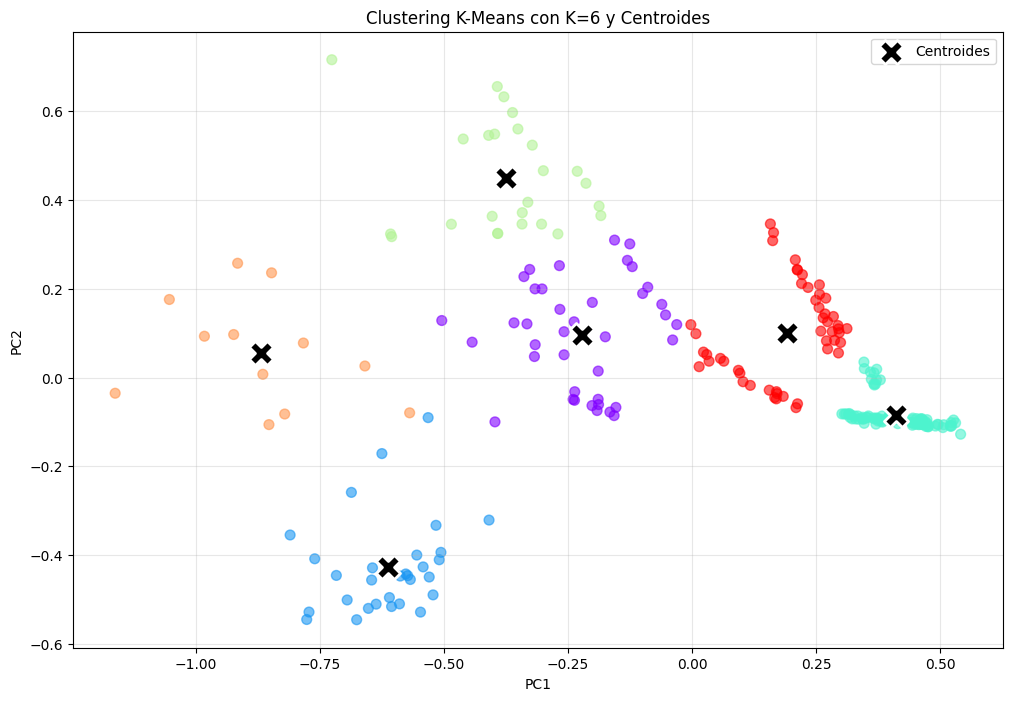

In [21]:
#Celda 14: Representar los clusters con los centroides
plt.figure(figsize=(12, 8))

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow', alpha=0.6, s=50)

centroids = kmeans_final.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='black',
    marker='X',
    s=300,
    edgecolors='white',
    linewidths=2,
    label='Centroides'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering K-Means con K={optimal_k} y Centroides')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [22]:
#Celda 15: Análisis de los clusters
print("ANÁLISIS DE CLUSTERS:")
print("="*60)
for i in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"  - Número de estrellas: {len(cluster_data)}")
    print(f"  - Tipos de estrellas: {cluster_data['Type'].value_counts().to_dict()}")


ANÁLISIS DE CLUSTERS:

Cluster 0:
  - Número de estrellas: 39
  - Tipos de estrellas: {4.0: 28, 3.0: 10, 5.0: 1}

Cluster 1:
  - Número de estrellas: 30
  - Tipos de estrellas: {5.0: 30}

Cluster 2:
  - Número de estrellas: 91
  - Tipos de estrellas: {0.0: 40, 1.0: 40, 2.0: 11}

Cluster 3:
  - Número de estrellas: 25
  - Tipos de estrellas: {4.0: 15, 3.0: 10}

Cluster 4:
  - Número de estrellas: 12
  - Tipos de estrellas: {5.0: 12}

Cluster 5:
  - Número de estrellas: 49
  - Tipos de estrellas: {2.0: 29, 3.0: 20}
